In [4]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data = pd.read_csv('F:\ML\Gold Prediction\gld_price_data.csv')


In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
correlation = gold_data.corr()



ValueError: Format specifier missing precision

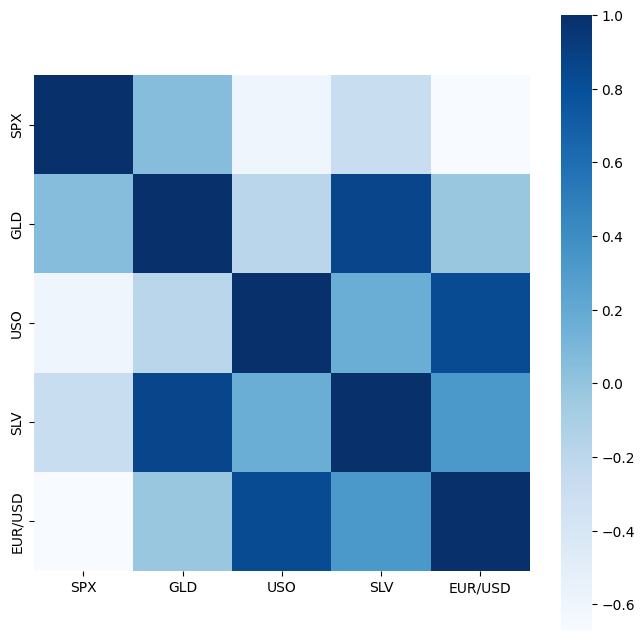

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True,fmt='.lf',annot=True,annot_kws={'size':8}, cmap='Blues' )

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_3020\1232657234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

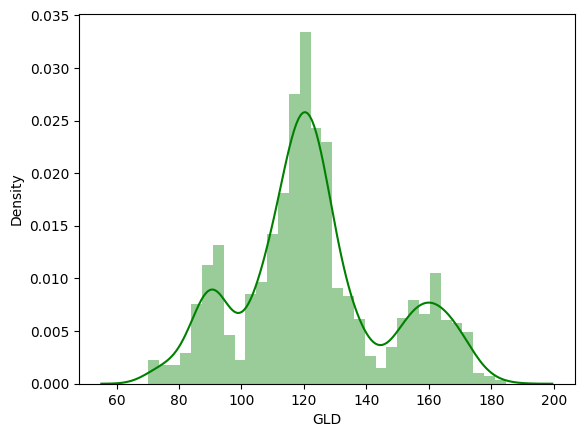

In [17]:
sns.distplot(gold_data['GLD'], color='green')

In [18]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.43769905  82.01829984 116.11329997 127.68990069 120.76790113
 154.7405981  150.17999827 126.04480052 117.55689885 125.8301014
 116.57480085 172.71570097 141.57319858 167.74479826 115.08519971
 117.68800057 139.65510313 170.06730062 159.93900319 156.50439929
 155.15410026 125.1214001  175.41549983 156.95530323 125.27240015
  93.91569939  76.98750058 120.49580025 119.06649931 167.5333001
  88.14600057 125.49460026  91.17360093 117.69950001 121.04779916
 136.3182006  115.60720117 115.32920076 147.45639933 107.45450111
 104.20790242  87.35709814 126.56680038 118.14430013 152.73389881
 119.75199994 108.45879973 108.33169834  93.17180044 127.08399794
  75.2425     113.58819903 121.28000002 111.33349927 118.96159891
 120.80029949 160.0500001  167.76390106 147.00359696  85.8365984
  94.28600019  86.74779883  90.53730069 119.05840072 126.46020058
 127.42009997 168.54320018 122.18109917 117.41499897  98.72490018
 168.07840153 142.92759833 132.02780223 121.13990227 121.41849931
 119.68820042

In [26]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889943771103384


In [27]:
Y_test = list(Y_test)

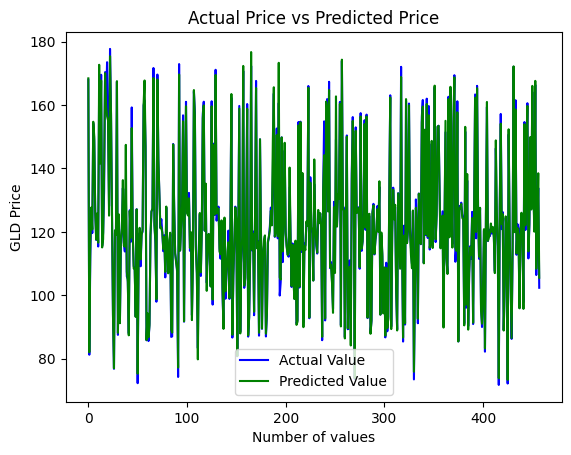

In [29]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()